In [1]:
# Import necessary libraries for the lab tasks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="font-size:1.5em; font-weight:bold;">Task A: Basic Visualizations with Matplotlib</span>

In [15]:
# Load the Superstore dataset using Pandas
file_path = '../Sample-Superstore.csv'
df = pd.read_csv(file_path, encoding='latin1')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

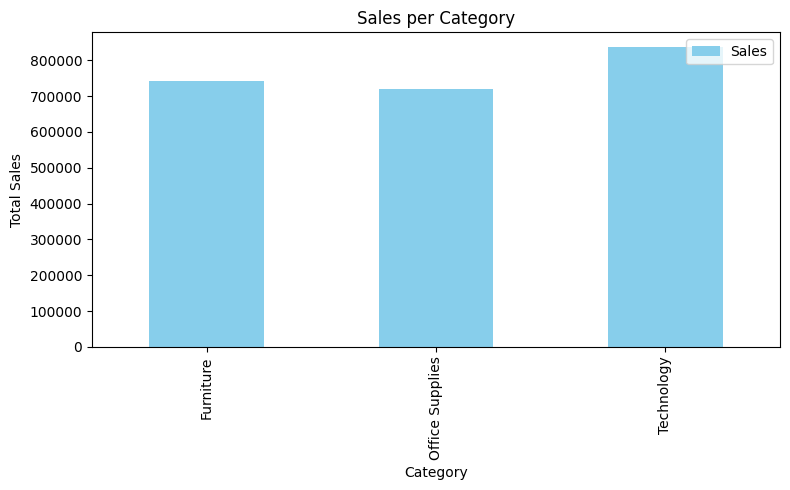

In [16]:
# Bar Chart: Sales per category using Matplotlib
category_sales = df.groupby('Category')["Sales"].sum()
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales per Category')
plt.legend(["Sales"], loc='upper right')
plt.tight_layout()
plt.show()

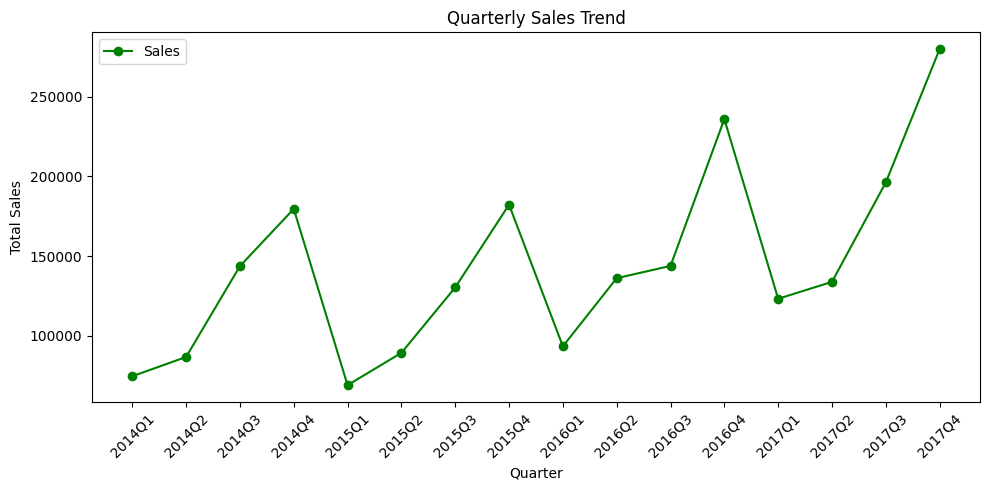

In [17]:
# Line Plot: Quarterly sales trend using Matplotlib
quarterly_sales = df.groupby(df["Order Date"].dt.to_period("Q"))["Sales"].sum()
plt.figure(figsize=(10,5))
quarterly_sales.index = quarterly_sales.index.astype(str)
plt.plot(quarterly_sales.index, quarterly_sales.values, marker='o', linestyle='-', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Quarterly Sales Trend')
plt.legend(["Sales"], loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="font-size:1.5em; font-weight:bold;">Task B: Basic Visualizations with Seaborn</span>

/tmp/ipykernel_2724494/2643231865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Sales', palette='Blues', ax=ax, label='Sales')


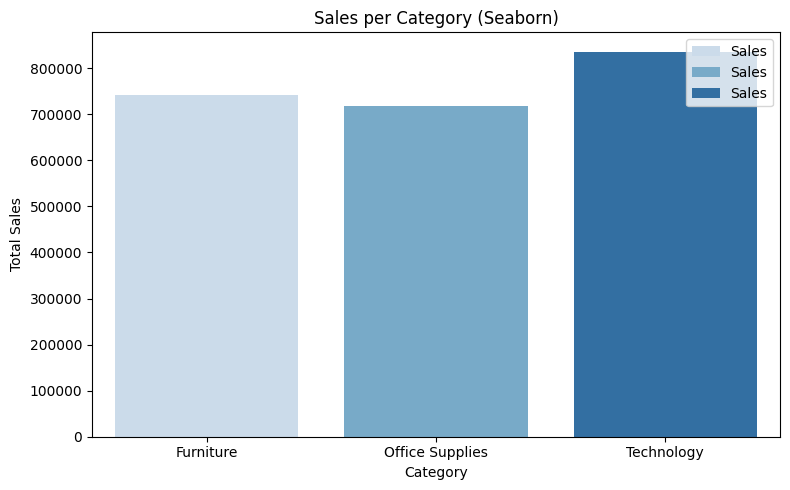

In [21]:
# Seaborn (Axes-level): Bar Chart - Sales per category
category_sales = df.groupby('Category', as_index=False)['Sales'].sum()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=category_sales, x='Category', y='Sales', palette='Blues', ax=ax, label='Sales')
ax.set(xlabel='Category', ylabel='Total Sales', title='Sales per Category (Seaborn)')
ax.legend(loc='upper right')
fig.tight_layout()

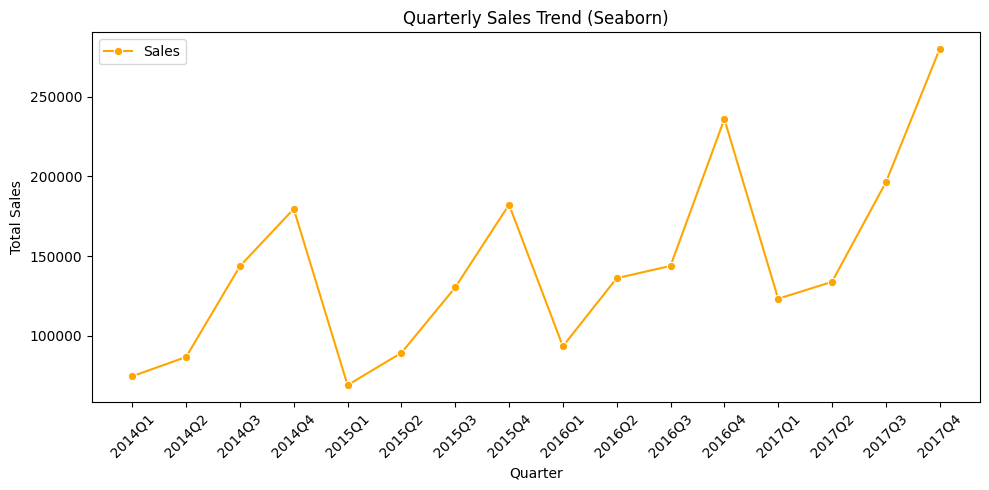

In [22]:
# Seaborn (Axes-level): Line Plot - Quarterly sales trend
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()
qs = quarterly_sales.reset_index()
qs['Order Date'] = qs['Order Date'].astype(str)
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=qs, x='Order Date', y='Sales', marker='o', color='orange', ax=ax, label='Sales')
ax.set(xlabel='Quarter', ylabel='Total Sales', title='Quarterly Sales Trend (Seaborn)')
ax.legend(loc='upper left')
plt.setp(ax.get_xticklabels(), rotation=45)
fig.tight_layout()

<span style="font-size:1.5em; font-weight:bold;">Task C: Pie-Chart Creation</span>

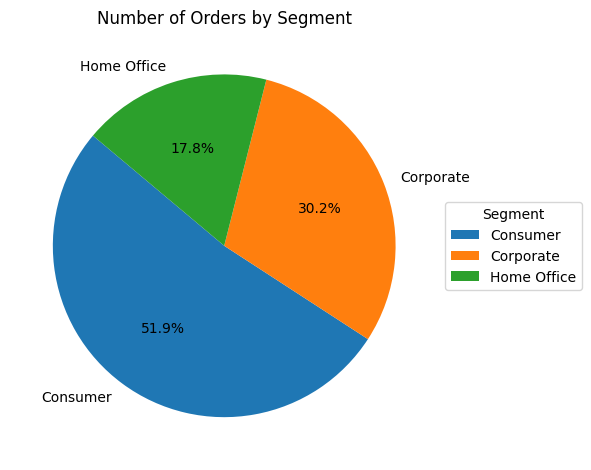

In [23]:
# Pie Chart: Number of orders by segment
segment_counts = df['Segment'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Number of Orders by Segment')
ax.legend(wedges, segment_counts.index, title='Segment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

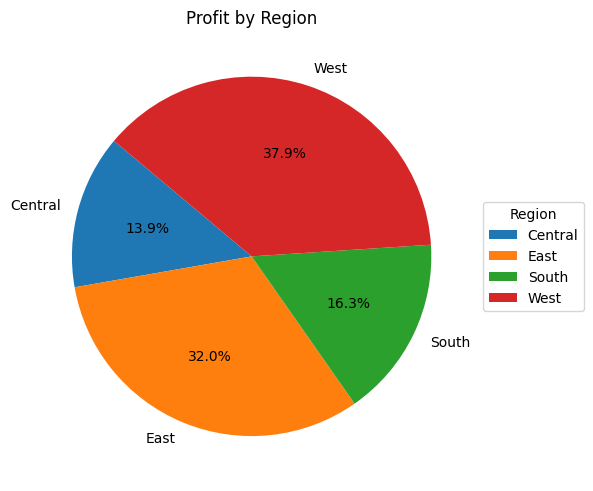

In [24]:
# Pie Chart: Profit by region
region_profit = df.groupby('Region')['Profit'].sum()
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Profit by Region')
ax.legend(wedges, region_profit.index, title='Region', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

<span style="font-size:1.5em; font-weight:bold;">Task D: Libraries Comparison Report</span>

Both libraries are complementary: Seaborn sits on top of Matplotlib, offering high-level, attractive defaults; Matplotlib provides full low-level control when you need precision.

| Library | Strengths | Weaknesses / Limitations | Suggested Scenarios |
|---|---|---|---|
| Matplotlib | • Fine-grained control over every plot element (axes, ticks, spines, annotations).<br>• Very mature ecosystem, widely used, extensive docs and examples.<br>• Works for many plot types (2D/3D, subplots, custom layouts) and backends.<br>• Publication-quality figures with precise tuning. | • More verbose; requires more code for common statistical plots.<br>• Default styling is basic; more manual formatting needed.<br>• DataFrame-aware conveniences are limited vs. Seaborn. | • Custom, highly controlled figures and complex layouts.<br>• Embedding plots in applications or reports that need exact formatting.<br>• Non-statistical/engineering plots where you want maximum flexibility. |
| Seaborn | • Beautiful defaults and themes; fast, clean visualizations with little code.<br>• DataFrame-native API; easy aggregation, grouping, and faceting.<br>• High-level statistical plots (categorical, distributions, regression, pair plots).<br>• Figure-level functions for quick multi-plot layouts. | • Less granular control; often need Matplotlib calls for advanced tweaks.<br>• Some plot types and parameters are opinionated/limited.<br>• Figure-level APIs can be confusing when customizing subplots deeply. | • Exploratory data analysis (EDA) and dashboards with consistent styling.<br>• Statistical/categorical summaries (bar, box, violin, line with CI).<br>• Quick prototypes and teaching where readability and speed matter. |

Tip: Use Seaborn for speed and clarity; drop to Matplotlib (Axes methods) when you need precise control or custom elements.